# <span style="color:red">Homework Solution 1</span>

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

### Data

This homework uses the data file, `treasury_quotes_2024-10-31`.

The problems below analyze the nominal, (rather than the TIPS,) Treasury issues. Accordingly, you should filter out all rows with `type` `TIPS Note` or `TIPS bond`.

***

# 1. Discount Rates

Use the data in the `selected quotes` tab.

Note:
* The selected treasuries are at nearly six-month intervals. 
* If you prefer, approximate that they mature at perfect 6-month intervals. 

### 1.1.

Create the cashflow matrix, $\textbf{C}$, where each rows is a Treasury issue, each column is a date, and each entry is the cash paid on a (normalized) face value of \$100.

### 1.2.

Estimate the spot discount factors that rationalize the market prices of the treasuries. Do this via solving the linear system

$$\textbf{p} = {\textbf{C}}\, \textbf{z}$$

### 1.3.

Plot the time-to-maturity on the horizontal axis. On the vertical axis, plot the...
* discount factors

Make another plot, this time with the vertical axis displaying the
* semiannually compounded discount rates
* continuously compounded discount rates

### 1.4.

Suppose that all discount rates and all coupon rates go up by 0.5\%. 

Calculate the new price of each of the treasury securities, using present value pricing.

***

# <span style="color:red">Solution 1</span>

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

import seaborn as sns
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *
from fixedinc import *

In [2]:
DATE = '2024-10-31'
SHEET = 'selected quotes'

filepath = f'../data/treasury_quotes_{DATE}.xlsx'
quotes = pd.read_excel(filepath, sheet_name=SHEET).set_index('KYTREASNO')

### <span style="color:red">1.1 and 1.2</span>

In [3]:
QUOTE_DATE = quotes['quote date'].iloc[0]
t_date = pd.to_datetime(QUOTE_DATE)


CF = pd.DataFrame(data=0, index=quotes.index, columns=quotes['maturity date'])

for i in quotes.index:
    coupon_dates = get_coupon_dates(t_date,pd.to_datetime(quotes.loc[i,'maturity date']))

    if coupon_dates is not None:
        CF.loc[i,coupon_dates] = quotes.loc[i,'cpn rate']/2

    CF.loc[i,quotes.loc[i,'maturity date']] += 100

CF = CF.resample('m',axis=1).sum()
CF.drop(columns=CF.columns[(CF==0).all()],inplace=True)
CF = CF.fillna(0).sort_index(axis=1)
CF

maturity date,2025-04-30,2025-10-31,2026-04-30,2026-10-31,2027-04-30,2027-10-31,2028-04-30,2028-10-31,2029-04-30,2029-10-31,2030-04-30,2030-10-31,2031-04-30,2031-10-31
KYTREASNO,,,,,,,,,,,,,,
208042,101.9375,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208129,2.5000,102.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208213,2.4375,2.4375,102.4375,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208302,2.0625,2.0625,2.0625,102.0625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207875,1.3750,1.3750,1.3750,1.3750,101.3750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207960,2.0625,2.0625,2.0625,2.0625,2.0625,102.0625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208044,1.7500,1.7500,1.7500,1.7500,1.7500,1.7500,101.7500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208132,2.4375,2.4375,2.4375,2.4375,2.4375,2.4375,2.4375,102.4375,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208216,2.3125,2.3125,2.3125,2.3125,2.3125,2.3125,2.3125,2.3125,102.3125,0.0000,0.0000,0.0000,0.0000,0.0000


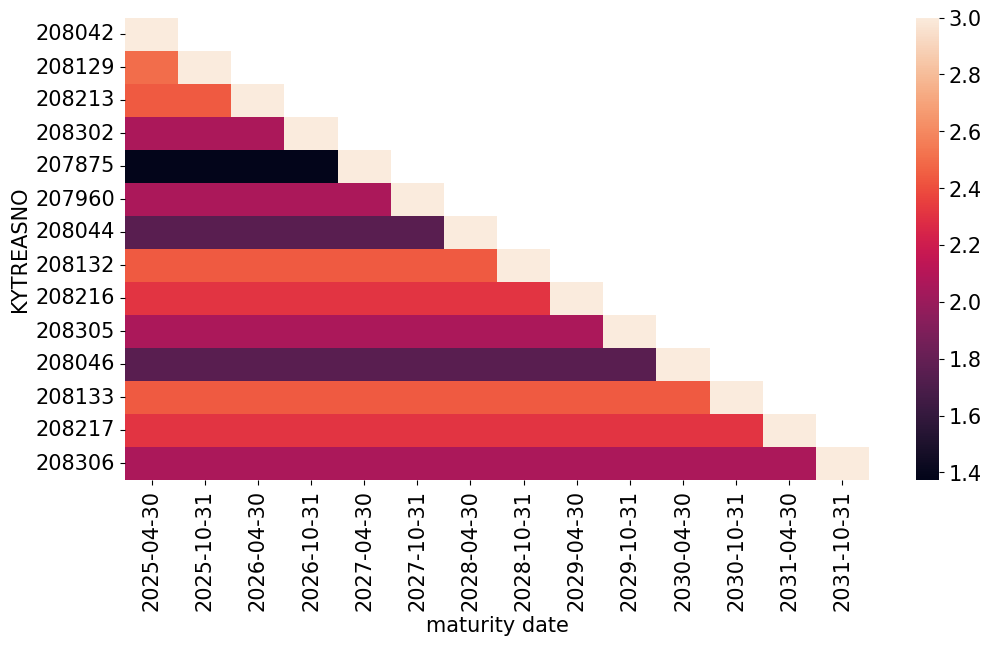

In [4]:
temp = CF.copy()
temp[temp==0] = np.nan
temp.columns = temp.columns.strftime("%Y-%m-%d")
sns.heatmap(temp,annot=False,vmax=3)
plt.show()

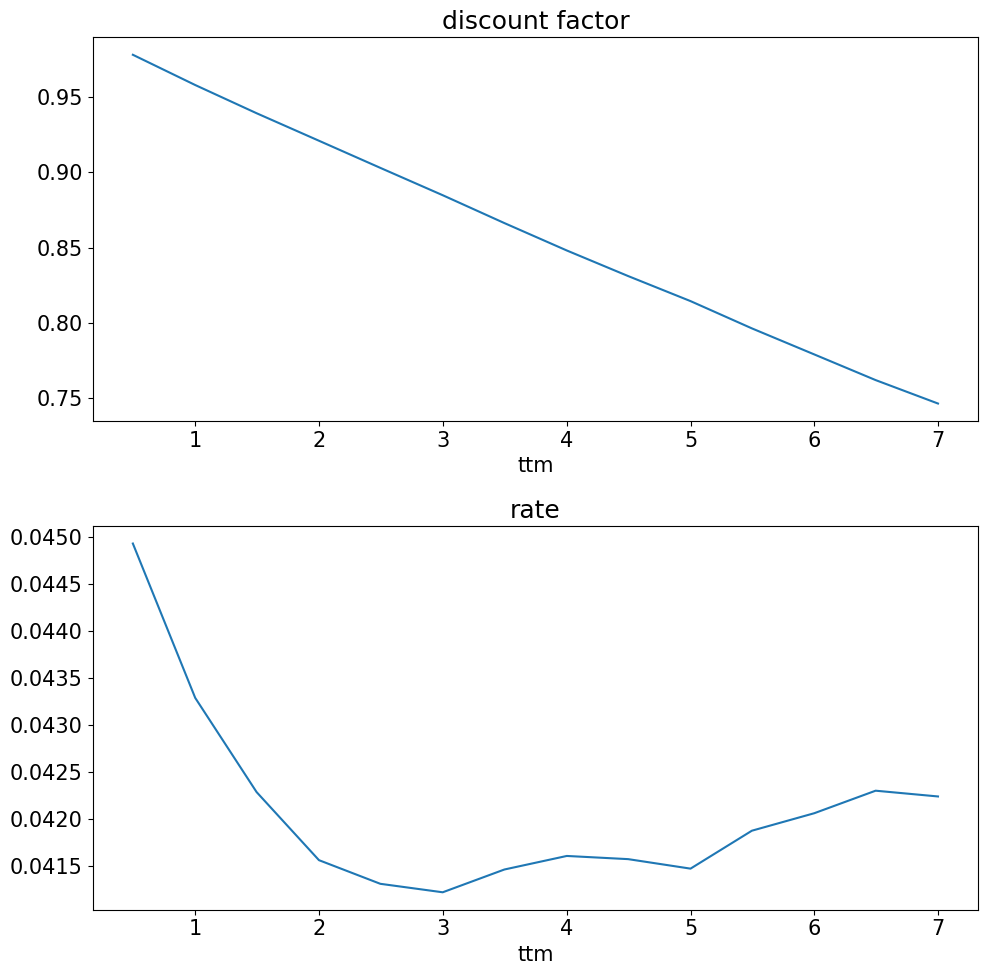

In [5]:
COMPOUNDING = 2
spot = pd.DataFrame(np.linalg.solve(CF,quotes['price'].loc[CF.index]), index=CF.index, columns=['discount factor'])
spot.insert(0,'ttm',quotes['ttm'])
spot = spot.reset_index().set_index('ttm')
spot['rate'] = discount_to_intrate(spot['discount factor'], spot.index,n_compound=COMPOUNDING)

fig, ax = plt.subplots(2,1,figsize=(10,10))
spot['discount factor'].plot(ax=ax[0],title='discount factor')
spot['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

### Alternatively: Bootstrap iteratively

Formula to bootstrap directly

In [6]:
import numpy as np
from scipy.optimize import fsolve

def bootstrap_spot_rates(df):
    """
    Bootstraps spot rates from a dataframe of bond information.
    
    :param df: Pandas DataFrame with columns 'price', 'cpn rate', and 'ttm'
    :return: Pandas Series of spot rates indexed by TTM
    """
    # Ensure the DataFrame is sorted by TTM
    df = df.sort_values(by='ttm')
    
    # Initialize a dictionary to store spot rates
    spot_rates = {}

    # Iterate over each bond
    for index, row in df.iterrows():
        ttm, coupon_rate, price = row['ttm'], row['cpn rate'], row['price']
        cash_flows = [coupon_rate / 2] * round(ttm * 2)  # Semi-annual coupons
        cash_flows[-1] += 100  # Add the face value to the last cash flow

        # Function to calculate the present value of cash flows
        def pv_of_cash_flows(spot_rate):
            pv = 0
            for t in range(1, len(cash_flows) + 1):
                if t/2 in spot_rates:
                    rate = spot_rates[t/2]
                else:
                    rate = spot_rate
                pv += cash_flows[t - 1] / ((1 + rate / 2) ** t)
            return pv

        # Solve for the spot rate that sets the present value of cash flows equal to the bond price
        spot_rate_guess = (cash_flows[-1] / price) ** (1/(ttm*2)) - 1
        spot_rate = fsolve(lambda r: pv_of_cash_flows(r) - price, x0=spot_rate_guess)[0]

        # Store the calculated spot rate
        spot_rates[ttm] = spot_rate

    return pd.Series(spot_rates)

### <span style="color:red">1.4</span>

In [7]:
rADJ = .005
CFadj = CF + rADJ/2 * 100 * (CF>0)
discadj = spot['rate'] + rADJ

In [28]:
spot['discount adjusted'] = intrate_to_discount(discadj,discadj.index,n_compound=COMPOUNDING)

pxadj = (CFadj @ spot[['discount adjusted']].values).rename(columns={0:'price adjusted'})
px = quotes['dirty price'].loc[pxadj.index]
price_comp = pd.concat([px,pxadj],axis=1)
price_comp.style.format('{:.2f}')

,dirty price,price adjusted
KYTREASNO,,
208042,99.72,99.72
208129,100.65,100.65
208213,100.95,100.94
208302,99.94,99.94
207875,96.77,96.79
207960,100.00,100.00
208044,97.92,97.94
208132,102.60,102.58
208216,101.91,101.89


### The revised price is nearly the exact same!

This illustrates the key point of a floating-rate note (bond):
* The change in interest rate impacts the discount AND the coupon.
* These two effects are *nearly* offsetting.

***

# 2. Estimating the Discount Curve with Real Data

Use the data in the `quotes` tab.

### 2.1. Map Cashflows

Construct the cashflow matrix.

Given the unfiltered data set, you will need to make a few modeling choices to do this...
* eliminate any treasury that does not report YTM or that reports a negative YTM.
* assume notes and bonds pay coupons every six months, going backward from the date of maturity.

Make other reasonable modeling assumptions as needed.

Report:
* head and tail rows of the dataframe, $\textbf{C}$, for instance, using `display()`.

* which date has the most cashflow across all issues?

* which date has the most issues paying a cashflow?

### 2.2. OLS

Estimate the discount factors using OLS.

Starting with the cashflow matrix, $C$, create an additional filter to get a subset where every date has at least one maturity, (possibly multiple,) and every issue has its maturity in the cashflow matrix. Call this set of cashflows, $\hat{C}$.

**Report 5 head and tail rows of $\hat{C}$.**

$$\textbf{p} = \hat{\textbf{C}}\,\textbf{z}_{\text{ols}}+\epsilon$$

Plot the time-to-maturity vs discount rates, semiannually compounded.

### 2.3. EXTRA (not graded)

Re-do `2.2.`, but this time use Weighted Least Squares. Find a weighting scheme that puts more weight on more recently issued treasures and less weight on less recently issued treasures. 

Does your answer change much?


### 2.4. Curve-Fitting

Continue with the model of cashflows (having filtered out some treasuries).

Estimate the discount curve via the Nelson-Siegel model.
* Fit via minimizing the sum of squared errors of the modeled prices against the quoted prices.
* Consider using `minimize` from `scipy.optimize`.

When done,
* Report the estimated NS parameters.
* Plot the semiannually-compounded discount rates along with those estimated with OLS from above.

***

# <span style="color:red">Solution 2</span>

In [9]:
SHEET = 'quotes'

filepath = f'../data/treasury_quotes_{DATE}.xlsx'
quotes = pd.read_excel(filepath, sheet_name=SHEET).set_index('KYTREASNO')

t_current = quotes['quote date'].values[0]

CFset = dict()

### <span style="color:red">Extra: Bootstrap</span>

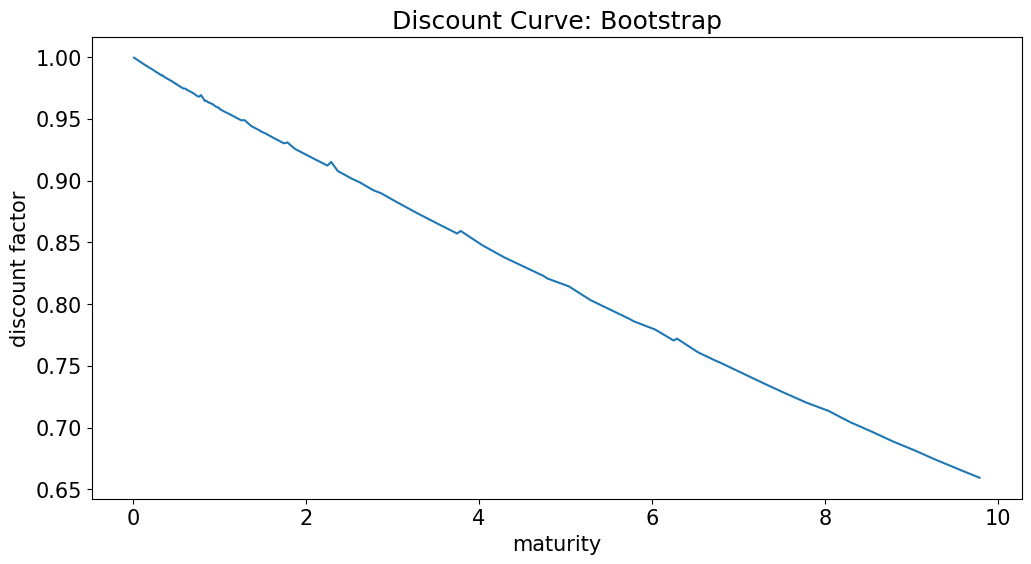

In [10]:
MODEL = bootstrap

RESTRICT_YLD = True
RESTRICT_TIPS = True

RESTRICT_DTS_MATURING = True
RESTRICT_REDUNDANT = True

data = filter_treasuries(quotes, t_date=t_current, filter_yld = RESTRICT_YLD, filter_tips = RESTRICT_TIPS, drop_duplicate_maturities=RESTRICT_REDUNDANT)
CF = filter_treasury_cashflows(calc_cashflows(data),filter_maturity_dates=RESTRICT_DTS_MATURING)

prices = quotes['dirty price'].loc[CF.index]
params_boot = estimate_rate_curve(MODEL,CF,t_current,prices)

label = 'single maturity per date, no non-maturity dates'
CFset[label] = CF

plt.plot(params_boot[0],params_boot[1])
plt.xlabel('maturity')
plt.ylabel('discount factor')
plt.title('Discount Curve: Bootstrap')
plt.show()

### <span style="color:red">2.1.</span>

In [11]:
CF = calc_cashflows(quotes)
CFset['all dates, all issues'] = CF
display(CF)

,2024-11-05,2024-11-07,2024-11-12,2024-11-14,2024-11-15,2024-11-19,2024-11-21,2024-11-26,2024-11-29,2024-11-30,...,2052-05-15,2052-08-15,2052-11-15,2053-02-15,2053-05-15,2053-08-15,2053-11-15,2054-02-15,2054-05-15,2054-08-15
KYTREASNO,,,,,,,,,,,,,,,,,,,,,
208246,100,0,0,0,0.0000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
208222,0,100,0,0,0.0000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
208247,0,0,100,0,0.0000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
208223,0,0,0,100,0.0000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
204083,0,0,0,0,103.7500,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208149,0,0,0,0,2.3750,0,0,0,0,0.0,...,2.3750,0.0000,2.3750,0.0000,2.3750,0.0000,102.3750,0.0000,0.0000,0.000
208191,0,0,0,0,0.0000,0,0,0,0,0.0,...,0.0000,1.0625,0.0000,1.0625,0.0000,1.0625,0.0000,101.0625,0.0000,0.000
208178,0,0,0,0,0.0000,0,0,0,0,0.0,...,0.0000,2.1250,0.0000,2.1250,0.0000,2.1250,0.0000,102.1250,0.0000,0.000


In [12]:
# Find the column with the largest sum
largest_sum_column = CF.sum().idxmax()

# Find the column with the most non-zero entries
most_nonzero_column = (CF != 0).sum().idxmax()

print(f"Date paying the most cash: {largest_sum_column:%Y-%m-%d}")
print(f"Date with the most paying bonds: {most_nonzero_column:%Y-%m-%d}")

Date paying the most cash: 2025-02-15
Date with the most paying bonds: 2025-02-15


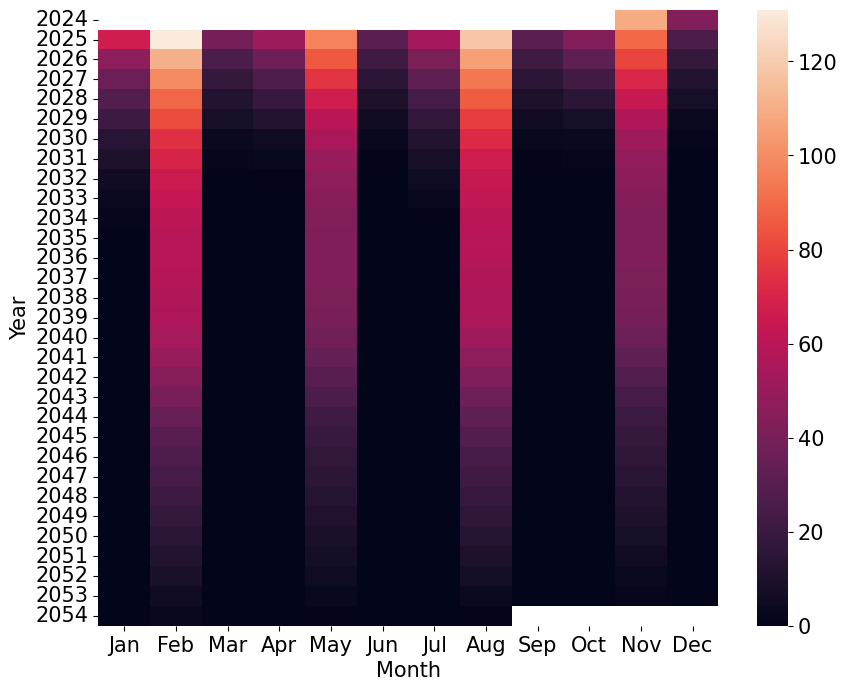

In [13]:
vec = (CF!=0).sum().resample('ME').sum()
heatmap_year_month(vec,figsize=(10,8))

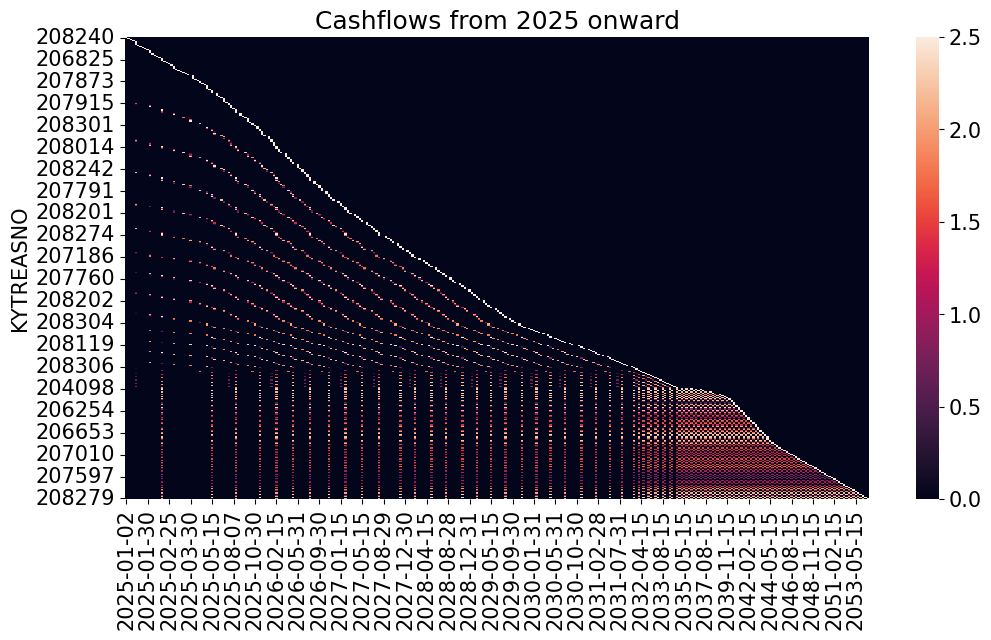

In [14]:
import matplotlib.dates as mdates

PLOT_CUT_YR ='2025'

temp =CF.copy()
temp[temp==0] = np.nan

tempplot = temp.loc[:,PLOT_CUT_YR:].dropna(how='all')
tempplot.fillna(0,inplace=True)
tempplot.columns = tempplot.columns.strftime("%Y-%m-%d")

sns.heatmap(tempplot,annot=False,vmax=2.5)
plt.title(f'Cashflows from {PLOT_CUT_YR} onward')
plt.show()

### <span style="color:red">2.2.</span>

In [15]:
MODEL = bootstrap

RESTRICT_YLD = True
RESTRICT_TIPS = True

RESTRICT_DTS_MATURING = True
RESTRICT_REDUNDANT = False

label = 'no non-maturity dates'

data = filter_treasuries(quotes, t_date=t_current, filter_yld = RESTRICT_YLD, filter_tips = RESTRICT_TIPS, drop_duplicate_maturities=RESTRICT_REDUNDANT)
CF = filter_treasury_cashflows(calc_cashflows(data),filter_maturity_dates=RESTRICT_DTS_MATURING)
CFset[label] = CF

display(CF)

,2024-11-05,2024-11-07,2024-11-12,2024-11-14,2024-11-15,2024-11-19,2024-11-21,2024-11-26,2024-11-29,2024-11-30,...,2032-05-15,2032-08-15,2032-11-15,2033-02-15,2033-05-15,2033-08-15,2033-11-15,2034-02-15,2034-05-15,2034-08-15
KYTREASNO,,,,,,,,,,,,,,,,,,,,,
208246,100,0,0,0,0.0000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208222,0,100,0,0,0.0000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208247,0,0,100,0,0.0000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208223,0,0,0,100,0.0000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
204083,0,0,0,0,103.7500,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208105,0,0,0,0,0.0000,0,0,0,0,0.0,...,0.0000,1.9375,0.0000,1.9375,0.0000,101.9375,0.0000,0.0000,0.0000,0.0000
208147,0,0,0,0,2.2500,0,0,0,0,0.0,...,2.2500,0.0000,2.2500,0.0000,2.2500,0.0000,102.2500,0.0000,0.0000,0.0000
208177,0,0,0,0,0.0000,0,0,0,0,0.0,...,0.0000,2.0000,0.0000,2.0000,0.0000,2.0000,0.0000,102.0000,0.0000,0.0000


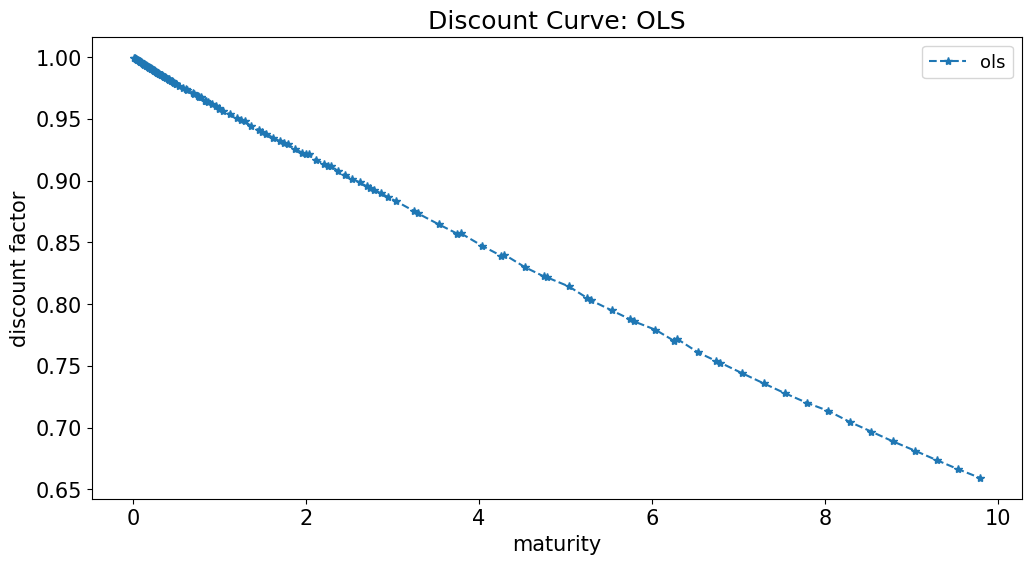

In [16]:
params_OLS = estimate_rate_curve(MODEL,CF,t_current,quotes['dirty price'].loc[CF.index])
disc_ols = pd.DataFrame({'maturity':params_OLS[0], 'ols': params_OLS[1]}).set_index('maturity')
disc_ols.plot(marker='*',linestyle='--',ylabel='discount factor',title='Discount Curve: OLS')
plt.show()

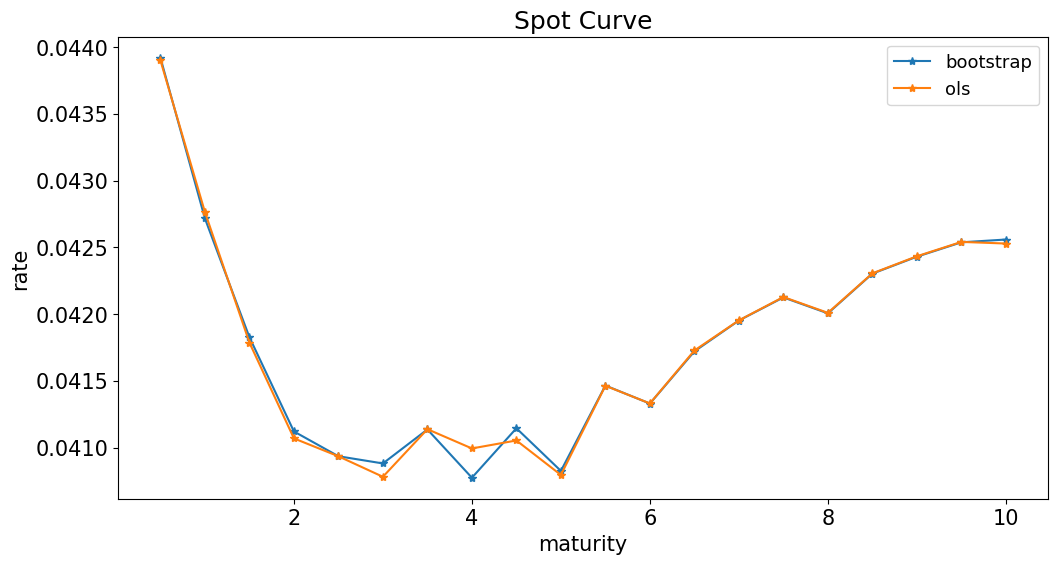

In [17]:
inc = .5

maturity_grid = np.arange(inc,disc_ols.index.to_series().max()+.5,inc)
curves_ols = pd.DataFrame(index = maturity_grid)
curves_ols['bootstrap'] = bootstrap(params_boot,maturity_grid)
curves_ols['ols'] = bootstrap(params_OLS,maturity_grid)

ax = curves_ols.plot(linestyle='-',marker='*',ylabel='rate',xlabel='maturity',title='Spot Curve')
plt.show()

### <span style="color:red">2.4.</span>

Could use the cashflows of all non-negative YTM from `2.1` or the reduced set used in `2.2`. Below we use the former.

In [18]:
RESTRICT_YLD = True
RESTRICT_TIPS = True

RESTRICT_DTS_MATURING = False
RESTRICT_REDUNDANT = False

data = filter_treasuries(quotes, t_date=t_current, filter_yld = RESTRICT_YLD, filter_tips = RESTRICT_TIPS, drop_duplicate_maturities=RESTRICT_REDUNDANT)

CF = filter_treasury_cashflows(calc_cashflows(data),filter_maturity_dates=RESTRICT_DTS_MATURING)
CFset['all dates'] = CF
prices = quotes['dirty price'].loc[CF.index]

AVG_LEVEL = .045
AVG_SLOPE = -.005
FIRST_HUMP = .01
FIRST_DECAY = 2
SECOND_HUMP = -.01
SECOND_DECAY = 2

x0 = np.array([AVG_LEVEL, AVG_SLOPE, FIRST_HUMP, FIRST_DECAY])
params_NS = estimate_rate_curve(nelson_siegel,CF,t_current,prices,x0)

x0 = np.concatenate((params_NS,(SECOND_HUMP, SECOND_DECAY)))
params_NSE = estimate_rate_curve(nelson_siegel_extended,CF,t_current,prices,x0=x0)

tab_params_ns = pd.DataFrame(data = params_NS, index=['theta 0', 'theta 1', 'theta 2', 'lambda_1'],columns=['Nelson-Siegel']).T
tab_params_ns.loc[:,['theta_3', 'lambda_2']] = None
tab_params_ns.loc['Nelson-Siegel Extended',:] = params_NSE
tab_params_ns

,theta 0,theta 1,theta 2,lambda_1,theta_3,lambda_2
Nelson-Siegel,0.047890,-0.002237,-0.020374,2.126948,None,None
Nelson-Siegel Extended,0.047856,-0.003927,-0.909713,1.613092,0.892451,1.598478


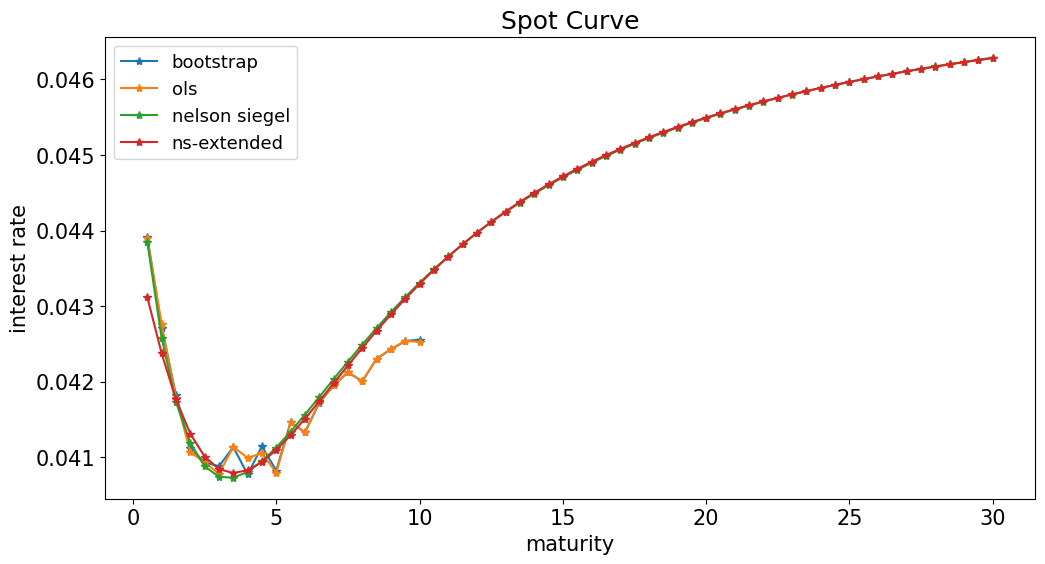

In [19]:
inc = .5

maturity_list = get_maturity_delta(CF.columns,t_current=t_current)
maturity_grid = np.arange(inc,maturity_list.max()+.5,inc)
curves = pd.DataFrame(index = maturity_grid)
curves['nelson siegel'] = nelson_siegel(params_NS,maturity_grid)
curves['ns-extended']= nelson_siegel_extended(params_NSE,maturity_grid)

ax = curves_ols.plot(linestyle='-',marker='*')
curves.plot(ax=ax, linestyle='-',marker='*')

series_plotted = list(curves_ols.columns) + list(curves.columns)
plt.legend(series_plotted)
plt.xlabel('maturity')
plt.ylabel('interest rate')
plt.title('Spot Curve')
plt.show()

#### <span style="color:red">Extra: Compare to raw YTMs</span>

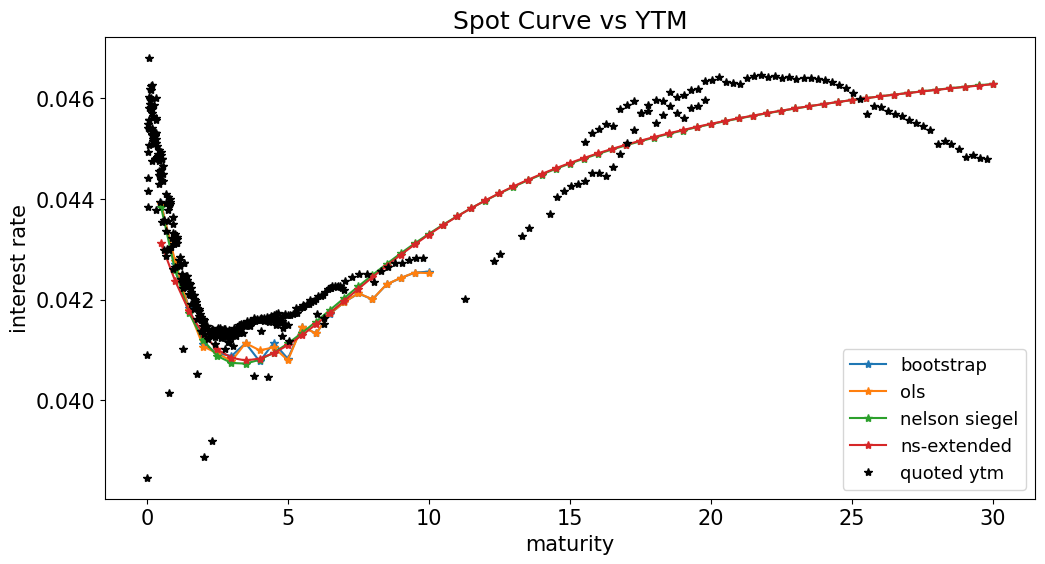

In [20]:
ax = curves_ols.plot(linestyle='-',marker='*')
curves.plot(ax=ax, linestyle='-',marker='*')
quotes.set_index('ttm')['ytm'].plot(ax=ax, linestyle='',marker='*', color='k')

series_plotted = list(curves_ols.columns) + list(curves.columns) + ['quoted ytm']
plt.legend(series_plotted)
plt.xlabel('maturity')
plt.ylabel('interest rate')
plt.title('Spot Curve vs YTM')
plt.show()

***

# 3. Yield-Curve Factors

### Data
This section uses data in `'../data/yields.xlsx`.



### 3.1. Yield Curve Movements

Use the yield curve time-series data to calculate the time-series of the **level**, **slope**, and **curvature** factors.

Calculate the yield-curve factors. For each point in time, calculate the following three factors:

$\begin{align}
x^{\text{level}}_t =& \frac{1}{N_{\text{yields}}}\sum_{i=1}^{N_{\text{yields}}} y^{(i)}_t\\
x^{\text{slope}}_t =& y^{(30)}_t - y^{(1)}_t\\
x^{\text{curvature}}_t =& -y^{(1)}_t + 2 y^{(10)}_t - y^{(30)}_t
\end{align}$

Report the 
* correlation matrix of the factors.
* *mean and volatility of the factors.

### 3.2. PCA

Calculate the principal components of the time-series yield data.

Report...
* the percentage of total variation explained by each factor.
* the loadings of the first two PCA factors.

#### Note
Consider using,
`PCA` from `sklearn.decomposition` 

### 3.3. Comparison

Compare the ad-hoc factors from `3.1.` with the PCA-estimated factors in `3.2.`.

Estimate the correlation of the ad-hoc level factor with the PCA-1. And the slope factor with PCA-2.

***

# <span style="color:red">Solution 3</span>

In [21]:
from sklearn.decomposition import PCA

## <span style="color:red">3.1.</span>

In [22]:
filepath = '../data/yields.xlsx'
yields = pd.read_excel(filepath, sheet_name='yields')
yields.set_index('caldt',inplace=True)

shapes = pd.DataFrame(yields.mean(axis=1),columns=['level'])
shapes['slope'] = yields[30]-yields[1]
shapes['curvature'] = -yields[1] + 2 * yields[10] - yields[30]

DATETHRESH = '2010-01-01'
shapesT = shapes[shapes.index>DATETHRESH]

In [23]:
shapes.describe()

,level,slope,curvature
count,15723.000000,15723.000000,15723.000000
mean,5.475250,1.109788,0.671817
std,2.914725,1.480255,0.971945
min,0.487603,-3.490292,-5.426753
25%,3.447801,-0.012832,0.096639
50%,5.193728,1.010982,0.623795
75%,7.166966,2.124039,1.335932
max,15.259628,4.358273,3.283792


In [24]:
shapes.corr()

,level,slope,curvature
level,1.000000,-0.375967,-0.169325
slope,-0.375967,1.000000,0.647671
curvature,-0.169325,0.647671,1.000000


## <span style="color:red">3.2.</span>

In [25]:
pca = PCA(svd_solver='full')
pca.fit(yields)
pca_var_explained = pd.DataFrame(pca.explained_variance_ratio_,columns=['Variance explained']).T
pca_var_explained.columns = list(np.arange(1,8,1))
pca_var_explained.style.format('{:.2%}'.format)

,1,2,3,4,5,6,7
Variance explained,97.07%,2.53%,0.29%,0.05%,0.04%,0.02%,0.01%


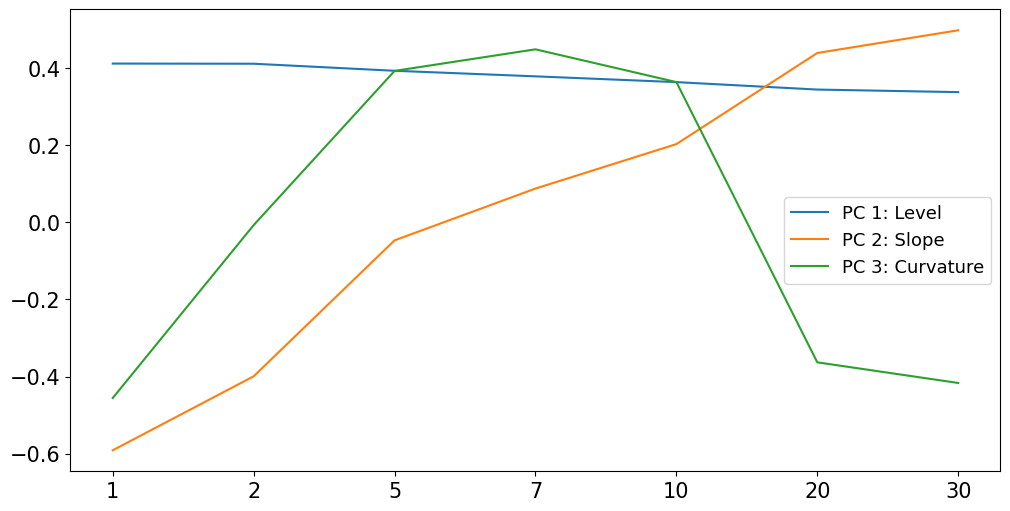

In [26]:
pca_wts = pd.DataFrame(pca.components_,columns=yields.columns)
pca_wts.index = ['PC 1: Level','PC 2: Slope','PC 3: Curvature','PCA 4','PCA 5','PCA 6','PCA 7']
if pca_wts.loc['PC 2: Slope',10]<0:
    pca_wts.loc['PC 2: Slope'] *= -1
if pca_wts.loc['PC 3: Curvature',10]<0:
    pca_wts.loc['PC 3: Curvature'] *= -1
pca_wts.T.iloc[:,0:3].plot();

## <span style="color:red">3.3.</span>

In [27]:
pca_factors = yields @ pca_wts.T
pd.concat([shapes, pca_factors.iloc[:,0:3]], axis=1, keys=['shapes', 'pca']).corr().loc['shapes', 'pca'].style.format('{:.1%}')

,PC 1: Level,PC 2: Slope,PC 3: Curvature
level,100.0%,1.2%,-0.1%
slope,-38.7%,91.8%,1.1%
curvature,-17.6%,64.0%,70.1%
